# Image Classification with Keras
(30 points)
### **Dataset**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:
1. airplane										
2. automobile										
3. bird										
4. cat										
5. deer										
6. dog										
7. frog										
8. horse										
9. ship										
10. truck

### **Problem**
1. create two deep neural network models: one with one Dense layer that contains 512 neurons and the other one with two Dense layers that contain 256 neurons in each layer.

2. compiler both models by setting the optimizer to **adam** (adaptive moment estimation) and loss function to **"sparse_categorical_crossentropy"**. 

3. train both models for **20 epochs** and output the **validation error** for both models.

3. compare the validation error of your models against that of the convolution neural network (CNN) model provided below and explain why CNN model is doing better.


## Load and process the dataset for training
**Please don't change this section!** 

You can use `(X_train, y_train) and (X_test, y_test)` for training and testing in your code respectively.

In [40]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [41]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

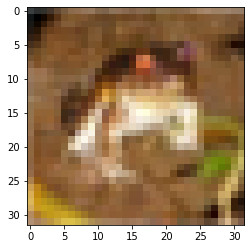

In [42]:
# show the first image in the data set
plt.imshow(X_train[0])

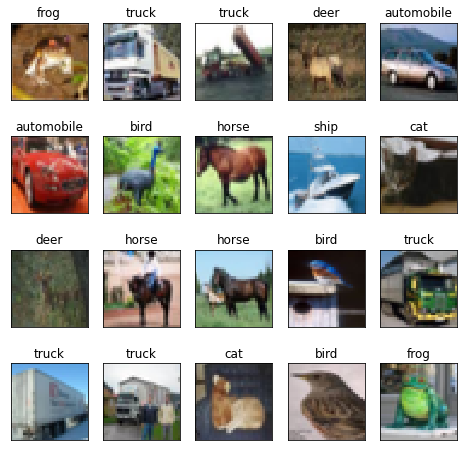

In [43]:
# show the first 15 images in the data set.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    #plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])

In [44]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

## Build, compile, and train the model object
You can start creating, compiling, and training your models here.

512 Neuron Model

In [45]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(512, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))


In [46]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [47]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [48]:
model.fit(x=X_train, y=y_train, epochs=20, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0339 - accuracy: 0.2653 - val_loss: 1.9691 - val_accuracy: 0.2865
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8732 - accuracy: 0.3341 - val_loss: 1.8247 - val_accuracy: 0.3516
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7992 - accuracy: 0.3629 - val_loss: 1.8690 - val_accuracy: 0.3419
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7574 - accuracy: 0.3794 - val_loss: 1.8649 - val_accuracy: 0.3413
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7188 - accuracy: 0.3922 - val_loss: 1.7500 - val_accuracy: 0.3784
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6917 - accuracy: 0.4016 - val_loss: 1.7198 - val_accuracy: 0.3883
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6657 - accuracy: 0.4134 - val_loss: 1.6961 - val_accuracy:

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.4253999888896942


In [51]:
predictions = model.predict(X_test)

In [52]:
# function that plots a single image.
def test_digit(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

256 Neuron Model

In [53]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [54]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [55]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [56]:
model.fit(x=X_train, y=y_train, epochs=20, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0375 - accuracy: 0.2557 - val_loss: 1.9339 - val_accuracy: 0.3077
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8588 - accuracy: 0.3328 - val_loss: 1.8084 - val_accuracy: 0.3602
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7831 - accuracy: 0.3627 - val_loss: 1.7675 - val_accuracy: 0.3720
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7361 - accuracy: 0.3816 - val_loss: 1.7547 - val_accuracy: 0.3735
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7019 - accuracy: 0.3939 - val_loss: 1.7227 - val_accuracy: 0.3901
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6718 - accuracy: 0.4041 - val_loss: 1.7240 - val_accuracy: 0.3921
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6486 - accuracy: 0.4122 - val_loss: 1.7227 - val_accuracy:

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.43549999594688416


In [59]:
predictions = model.predict(X_test)

In [60]:
# function that plots a single image.
def test_digit(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("digit:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

## Compare against Convolution Neural Network (CNN) Model
**Please don't change this section!** 

You just need to run the following to create and train a convolution neural network and compare the validation error to those from your models and explain why CNN is better.

In [61]:
!rm -rf logs/model_cnn
#Build the model object
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs/model_cnn", histogram_freq=1)
model_cnn.fit(x=X_train, y=y_train, epochs=20, 
      validation_data=(X_test, y_test),
      callbacks=[tensorboard_callback]) # Start training process

'rm' is not recognized as an internal or external command,
operable program or batch file.


Epoch 1/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6983 - accuracy: 0.3831 - val_loss: 1.4143 - val_accuracy: 0.4915
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3063 - accuracy: 0.5370 - val_loss: 1.2295 - val_accuracy: 0.5610
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1389 - accuracy: 0.5992 - val_loss: 1.1494 - val_accuracy: 0.5904
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.0290 - accuracy: 0.6386 - val_loss: 1.0538 - val_accuracy: 0.6270
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9536 - accuracy: 0.6657 - val_loss: 0.9826 - val_accuracy: 0.6553
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8899 - accuracy: 0.6913 - val_loss: 1.1147 - val_accuracy: 0.6134
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8390 - accuracy: 0.7066 - val_loss: 0.9653 - val_ac

In [63]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)


Test accuracy: 0.43549999594688416


512 Model Validation Error: 1.6492
<br>
<br>
256 Model Validation Error: 1.6248
<br>
<br>
CNN Model Validation Error: 1.0986
<br>
<br>
The CNN Model's validation error of 1.0986 is less than both of the Deep Neural Networks. Therefore the CNN model is doing better during the validation stage of the model and is more accurate.